### Importing the dependencies

In [71]:
#importing dependencies 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor

### Readidng data from apple stock prices csv file downloaded from Yahoo Finance 

In [39]:
#reading csv files
df=pd.read_csv(r'C:\Users\rkumar35\Siraj Course\Week 2 Homework\AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
1,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
3,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
4,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.210916,194.264861,190.205617,192.233148,190.616901,3.260504e+07
std,21.103763,21.256209,20.986018,21.047795,20.845204,1.392422e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.290740e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.966390e+07
75%,207.574997,209.194999,205.274994,207.610001,206.495002,3.890535e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


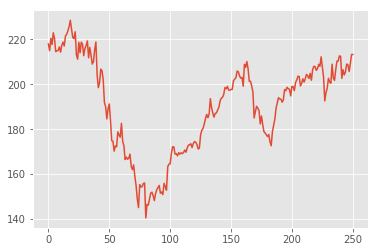

In [42]:
df['Adj Close'].plot()

### Data Preprocessing

In [44]:
df.set_index("Date",inplace=True)

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400


In [46]:
window_size=32
num_samples=len(df)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [47]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [48]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [53]:
x_test.shape

(44, 32)

In [84]:
#plot method  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='blue', linewidth=1.8)

### Using Scikit learn models to predict the price of that stock for a future date.

### Mehtod-1 Linear Regression

,Actual,Predicted
0,199.262909,203.695241
1,200.478302,197.246368
2,202.460754,200.011226
3,200.986359,203.103838
4,202.530502,200.174430
5,204.433273,204.431895
6,203.725952,204.391745
7,202.580307,202.368779
8,204.881561,203.360818
9,201.823181,204.433214


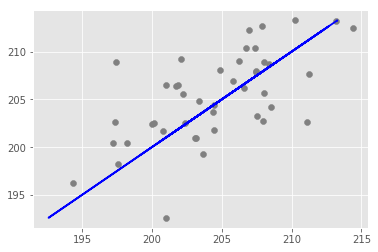

In [100]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

#generate predictions
y_pred_lr=model_lr.predict(x_test)

#plot results
get_plot(y_pred_lr)

#actual value vs predicted value
df_lr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lr.flatten()})
df_lr


### Mehtod-2 Ridge Regression

,Actual,Predicted
0,199.262909,203.694169
1,200.478302,197.251679
2,202.460754,200.008765
3,200.986359,203.101760
4,202.530502,200.177767
5,204.433273,204.428323
6,203.725952,204.391774
7,202.580307,202.371488
8,204.881561,203.358892
9,201.823181,204.432320


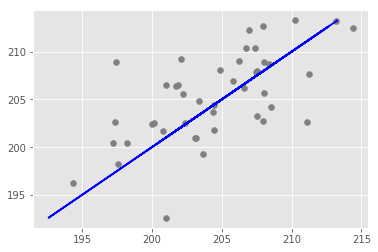

In [99]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

#plot results
get_plot(y_pred_ridge)

#actual value vs predicted value
df_ridge = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ridge.flatten()})
df_ridge


### Mehtod-3 K Nearest Neighbor (KNN)

,Actual,Predicted
0,199.262909,203.546631
1,200.478302,203.546631
2,202.460754,203.215583
3,200.986359,205.742966
4,202.530502,204.651337
5,204.433273,204.651337
6,203.725952,203.232216
7,202.580307,202.899765
8,204.881561,200.274879
9,201.823181,200.274879


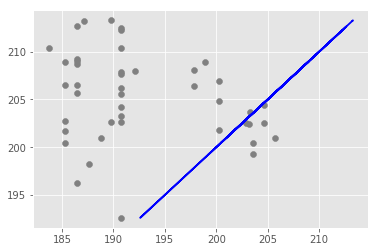

In [98]:
# KNN Regression
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(x_train, y_train)

#generate predictions
y_pred_knn=model_knn.predict(x_test)

#plot results
get_plot(y_pred_knn)

#actual value vs predicted value
df_knn = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_knn.flatten()})
df_knn


### Mehtod-4 Gradient Boosting Trees

,Actual,Predicted
0,199.262909,203.263051
1,200.478302,202.313350
2,202.460754,201.471641
3,200.986359,203.298184
4,202.530502,203.985958
5,204.433273,203.956348
6,203.725952,201.321889
7,202.580307,202.320511
8,204.881561,202.524081
9,201.823181,202.485896


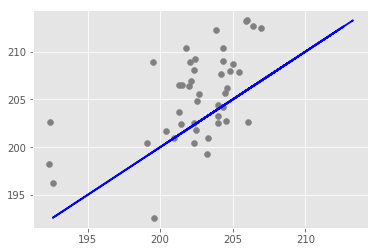

In [97]:
# Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# #generate predictions
y_pred_gb = model_gb.predict(x_test)

#plot results
get_plot(y_pred_gb)

#actual value vs predicted value
df_gbt = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
df_gbt


### Evaluation of the models used using score method

In [89]:
cnfd_lin_reg = model_lr.score(x_test, y_test)
cnfd_ridge_reg = model_ridge.score(x_test,y_test)
cnfd_knn = model_knn.score(x_test,y_test)
cnfd_gbt=model_gb.score(x_test,y_test)
print('Liner Regression Model confidence is' + str(cnfd_lin_reg))
print('Ridge Regression Model confidence is' + str(cnfd_ridge_reg))
print('KNN Model confidence is' + str(cnfd_knn))
print('Gradient Boosting Trees Model confidence is' + str(cnfd_gbt))



Liner Regression Model confidence is0.24604864448603359
Ridge Regression Model confidence is0.24626521604828866
KNN Model confidence is-10.642257633781291
Gradient Boosting Trees Model confidence is-0.06298817750918273


In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### CONCLUSION 

***Based on the results we can conclude that linear regression and ridge regression have better confidence scores so they have done a better job in predicitng.***


## Resources

*   [In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)
*   [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
* [https://github.com/mannybernabe/intro_timeseries]